# Setting

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("~/github/handson-ml/datasets/housing/housing.csv")

In [100]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 범주형 칼럼 변환

In [32]:
data_cat = data[["ocean_proximity"]]

In [33]:
data_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


## OrdinalEncoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [40]:
print(data_cat_encoded[:10])

[[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [38]:
print(type(data_cat_encoded))

<class 'numpy.ndarray'>


In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## OneHotEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [44]:
print(type(data_cat_1hot))

<class 'scipy.sparse.csr.csr_matrix'>


In [45]:
data_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 직접 변환기 만들기

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

sklearn은 (상속이 아닌) duck typing을 지원하므로 fit()(selft를 반환), transform(), fit_transform() 메서드를 구현한 파이썬 클래스 제작

BaseEstimator를 상속하고 생성자에 args나 kargs를 사용하지 않으면 하이퍼파라미터 튜닝에 필요한 get_params()와 set_params()를 얻게됨

In [68]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) : # *args나 **kargs가 아님
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else :
            return np.c_[X, rooms_per_household, population_per_household]

In [69]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
data_extra_attribs = attr_adder.transform(data.values)

In [71]:
type(data_extra_attribs)

numpy.ndarray

In [72]:
data_extra_attribs.shape

(20640, 13)

In [73]:
data_extra_attribs

array([[-122.23, 37.88, 41.0, ..., 5, 6.984126984126984,
        2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 5, 6.238137082601054,
        2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 5, 8.288135593220339,
        2.8022598870056497],
       ...,
       [-121.22, 39.43, 17.0, ..., 2, 5.20554272517321,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 2, 5.329512893982808,
        2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 2, 5.254716981132075,
        2.616981132075472]], dtype=object)

# Scaling

모든 변환기에서 Scaling은 테스트 데이터가 포함된 전체 데이터가 아닌 훈련 데이터에 대해서만 fit() 메서드를 적용한 후, 훈련 데이터와 테스트 데이터에 대해 transform() 메서드를 사용해야 함

## Min-Max Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
minmax_scaler = MinMaxScaler()

In [91]:
data_num = data.drop("ocean_proximity", axis = 1) # 범주형 변수 제거
data_num_tr = minmax_scaler.fit_transform(data_num)

In [92]:
print(type(data_num_tr))

<class 'numpy.ndarray'>


In [93]:
data_num_tr

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.53966842, 0.90226638,
        1.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.53802706, 0.70824656,
        1.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.46602805, 0.69505074,
        1.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.08276438, 0.15938285,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.09429525, 0.14371281,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.13025338, 0.15340349,
        0.25      ]])

## Standardization

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [81]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [85]:
type(num_pipeline)

sklearn.pipeline.Pipeline

In [94]:
data_num = data.drop("ocean_proximity", axis = 1) # 범주형 변수 제거
data_num_tr = num_pipeline.fit_transform(data_num)
data_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

## ColumnTransformer

In [95]:
from sklearn.compose import ColumnTransformer

In [101]:
data_num = data.drop("ocean_proximity", axis = 1) # 범주형 변수 제거
num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

In [103]:
full_pipeline = ColumnTransformer([
    # ("이름", 변환기, 변환기가 적용될 칼럼 이름)
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [104]:
data_prepared = full_pipeline.fit_transform(data)

In [105]:
type(data_prepared)

numpy.ndarray

In [106]:
data_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

# 숫자형 칼럼을 구간별로 카테고리화 하기

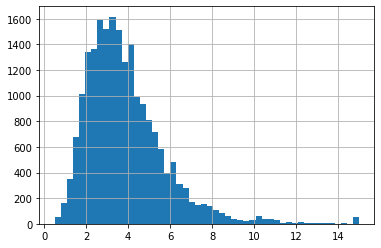

In [5]:
data["median_income"].hist(bins = 50)
plt.show()

In [8]:
data["income_cat"] = pd.cut(data["median_income"],
                            bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                            labels = [1, 2, 3, 4, 5])

In [11]:
data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

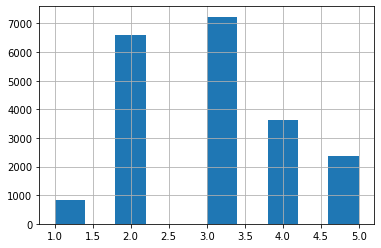

In [12]:
data["income_cat"].hist()

# Train / Test Data 나누기

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
print("전체 데이터 수 : {}".format(len(data)))
print("훈련 데이터 수 : {}".format(len(train_set)))
print("테스트 데이터 수 : {}".format(len(test_set)))

전체 데이터 수 : 20640
훈련 데이터 수 : 16512
테스트 데이터 수 : 4128


## 계층 샘플링

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
#for train_index, test_

In [27]:
for train_index, test_index in split.split(data, data["income_cat"]) :
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [29]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64